# Modeling with Neural Network

In [10]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')



## Simulation for 8-bit APUF

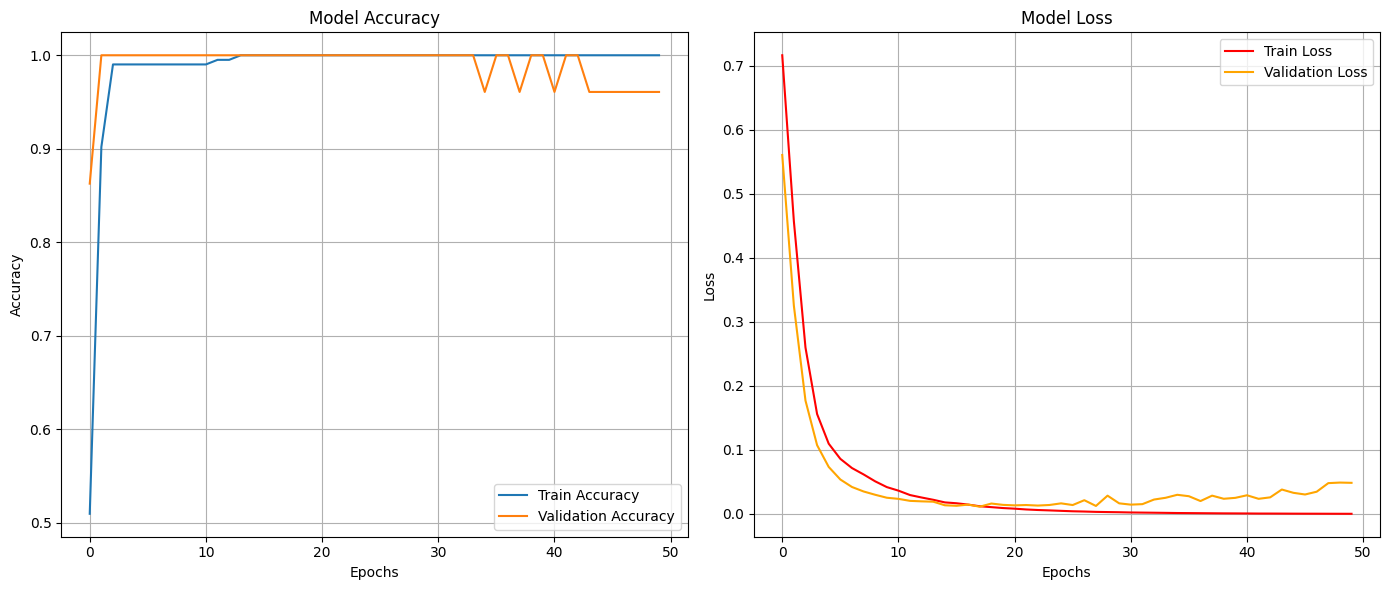

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9739 - loss: 0.0325     
Test Loss: 0.048664309084415436
Test Accuracy: 0.9607843160629272


In [36]:
n = 8
# Assuming your dataset is in a CSV file
# input = pd.read_csv(f"input_{n}.csv")
input = pd.read_csv(f"data/phi_{n}.csv")
output = pd.read_csv(f"data/output_{n}.csv")
# Separate features (input) and target (output) columns
x = pd.DataFrame(input)
y = pd.DataFrame(output)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(units=n, activation='tanh', input_dim=n))
model.add(Dense(units=4, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=50, batch_size=1, validation_data=(X_test, Y_test),verbose=0)

# Create a figure and axes
fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot accuracy
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
ax[0].grid(True)

# Plot loss
ax[1].plot(history.history['loss'], label='Train Loss', color='red')
ax[1].plot(history.history['val_loss'], label='Validation Loss', color='orange')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()
ax[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Save the combined plot
plt.savefig(f'plots/accuracy_plot_{n}.png')

# Show the plot
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

## Simulation for 16-bit APUF

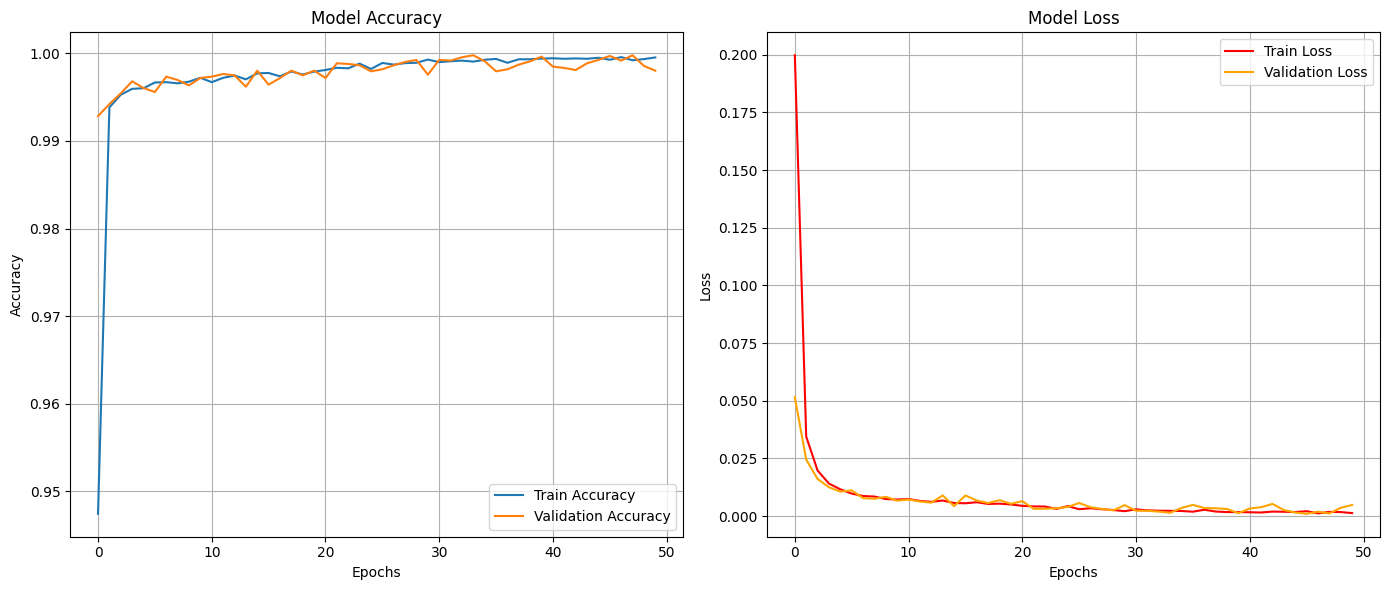

410/410 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.9984 - loss: 0.0043
Test Loss: 0.004798444453626871
Test Accuracy: 0.9980162978172302


In [27]:
n = 16
# Assuming your dataset is in a CSV file
# input = pd.read_csv(f"input_{n}.csv")
input = pd.read_csv(f"data/phi_{n}.csv")
output = pd.read_csv(f"data/output_{n}.csv")
# Separate features (input) and target (output) columns
x = pd.DataFrame(input)
y = pd.DataFrame(output)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(units=n, activation='tanh', input_dim=n))
model.add(Dense(units=4, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=50, batch_size=50, validation_data=(X_test, Y_test),verbose=0)

# Create a figure and axes
fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot accuracy
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
ax[0].grid(True)

# Plot loss
ax[1].plot(history.history['loss'], label='Train Loss', color='red')
ax[1].plot(history.history['val_loss'], label='Validation Loss', color='orange')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()
ax[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Save the combined plot
plt.savefig(f'plots/accuracy_plot_{n}.png')

# Show the plot
plt.show()


# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)